# Code simplified version for sub question

## Analysis

### Import involved packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2 
import scipy.stats as stats
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
from pandas.api.types import CategoricalDtype

### Read datasets

In [10]:
def read_data(path):
    df = pd.read_csv(path)
    df_copy = df.copy()
    df_copy['Start'] = pd.to_datetime(df_copy["Start"])
    df_copy['Date'] = df_copy['Start'].dt.date
    df_copy['Date'] = pd.to_datetime(df_copy['Date'])
    df_copy['Weekday'] = df_copy['Date'].dt.day_name()
    df_copy['Date'] = pd.to_datetime(df_copy['Date'])
    df_copy = df_copy.rename(columns = {"Steps (count)":"Steps"})
    df_copy = df_copy.drop(columns = ["Start","Finish"]) 
    return df_copy

df_P3 = read_data("../../../datasets/Participant-03.csv")
df_P7 = read_data("../../../datasets/Participant-07.csv")
df_P4 = read_data("../../../datasets/Participant-04.csv")

### Data Exploration


The next code block sums up all the steps for each weekday and have a simple visualization of a bar plot. The premise of doing this is we have a similar days of each weekday. Instread of calculate the mean, the overall sum would be more intutive because the difference would be smaller once when use mean.

              Steps
Weekday            
Monday     320383.0
Tuesday    286323.0
Wednesday  284938.0
Thursday   294583.0
Friday     253461.0
Saturday   306291.0
Sunday     237623.0


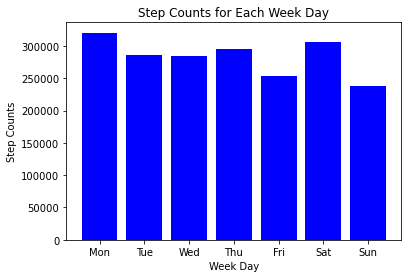

              Steps
Weekday            
Monday     218756.0
Tuesday    183960.0
Wednesday  264721.0
Thursday   228975.0
Friday     173093.0
Saturday   174714.0
Sunday     187820.0


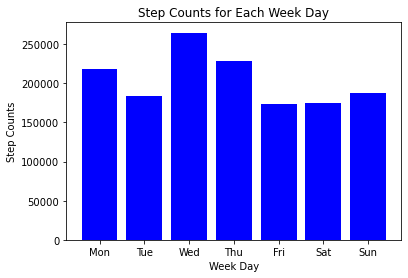

              Steps
Weekday            
Monday     317481.0
Tuesday    395818.0
Wednesday  322864.0
Thursday   416449.0
Friday     318869.0
Saturday   783599.0
Sunday     334802.0


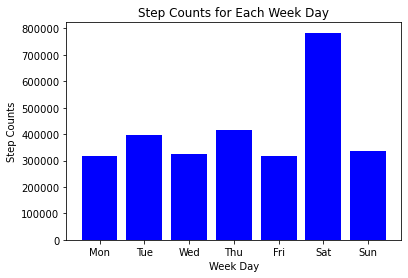

In [11]:
def sum_of_steps(df): 
    outcome_1 = df[["Weekday","Steps"]].groupby("Weekday").sum()
    week_dict = {'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
    outcome_1["Steps"] = outcome_1["Steps"].round() # remove the digit in the steps
    outcome_1 = outcome_1.sort_values("Weekday", key = lambda x : x.apply (lambda x : week_dict[x]))
    print(outcome_1)
    plt.bar(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], outcome_1["Steps"], color='b')
    plt.plot()
    plt.xlabel("Week Day")
    plt.ylabel("Step Counts")
    plt.title("Step Counts for Each Week Day")
    plt.show()
sum_of_steps(df_P7)
sum_of_steps(df_P3)
sum_of_steps(df_P4)

For participant 7, we can observe that friday and sunday are the least active day within all the weekdays.

### Sub-question

,Weekday,<5k,5k-10k,>10k
0,Monday,3,19,15
1,Tuesday,8,18,11
2,Wednesday,4,23,9
3,Thursday,6,19,11
4,Friday,5,27,4
5,Saturday,2,25,10
6,Sunday,10,25,2


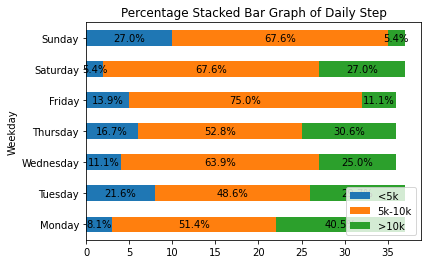

In [6]:
def sub_q(df):
    df = df.groupby(['Date','Weekday'],as_index = False)['Steps'].sum()
    # df = df.assign(Health_index = lambda x: (x['Steps']))
    df.loc[df['Steps'] < 10000,'Step_index'] = '5k-10k'
    df.loc[df['Steps'] < 5000,'Step_index'] = '<5k'
    df.loc[df['Steps'] > 10000,'Step_index'] = '>10k'
    df = df[['Weekday','Step_index']].copy()
    cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    cat_type = CategoricalDtype(categories=cats, ordered=False)
    df['Weekday'] = df['Weekday'].astype(cat_type)
    # grouped = df.groupby(by = ['Weekday','Step_index']).count()
    df = pd.get_dummies(df['Step_index']).groupby(df['Weekday']).sum().reset_index()
    df = df.loc[:,['Weekday','<5k','5k-10k','>10k']]
    df.plot(
        x = 'Weekday',
        kind = 'barh',
        stacked = True,
        title = 'Percentage Stacked Bar Graph of Daily Step',
        mark_right = True)
    df_total = df['<5k'] + df['5k-10k'] + df['>10k']
    df_rel = df[df.columns[1:]].div(df_total, 0)*100

    for n in df_rel:
        for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                             df[n], df_rel[n])):
            plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                     va = 'center', ha = 'center')
    return df
sub_q(df_P7)

,Weekday,<5k,5k-10k,>10k
0,Monday,15,12,9
1,Tuesday,16,18,2
2,Wednesday,9,19,8
3,Thursday,15,15,6
4,Friday,19,10,6
5,Saturday,22,9,6
6,Sunday,20,8,8


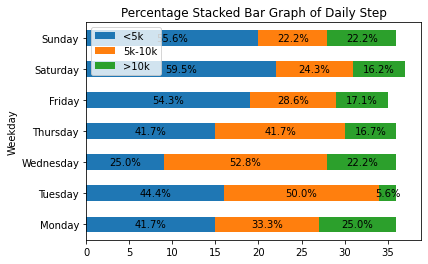

In [12]:
sub_q(df_P3)

,Weekday,<5k,5k-10k,>10k
0,Monday,4,23,9
1,Tuesday,6,7,23
2,Wednesday,3,21,12
3,Thursday,4,8,24
4,Friday,3,23,9
5,Saturday,0,3,33
6,Sunday,2,22,12


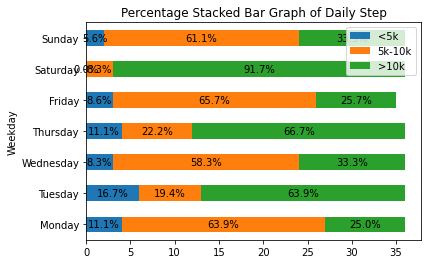

In [14]:
sub_q(df_P4)